# Business Context & Data Overview

## Purpose of this Notebook
This notebook introduces the business context of the analysis and provides an overview
of the consolidated dataset used to build a business analytics and credit risk
management framework.

The focus is on portfolio-level understanding and management-relevant data exploration,
rather than model development.


## Business Context

The dataset represents a consumer credit portfolio of a non-banking financial institution.
Each observation corresponds to a loan application enriched with customer, credit,
and historical bureau information.

From a management perspective, the data supports:
- Portfolio performance monitoring
- Credit risk assessment across segments
- Management reporting and decision support
- Identification of early warning signals

This project is positioned from a **business analytics and credit risk management**
point of view.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("talk")


In [2]:
cols = pd.read_csv(
    "../archive/feature_matrix.csv",
    nrows=0
).columns

cols[:20], len(cols)


(Index(['SK_ID_CURR', 'NAME_TYPE_SUITE', 'REG_REGION_NOT_LIVE_REGION',
        'EXT_SOURCE_2', 'OCCUPATION_TYPE', 'FLAG_PHONE', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION',
        'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'REG_CITY_NOT_LIVE_CITY',
        'COMMONAREA_AVG', 'FLAG_WORK_PHONE', 'HOUSETYPE_MODE',
        'FLAG_DOCUMENT_21', 'ELEVATORS_AVG', 'LIVINGAPARTMENTS_MODE', 'set'],
       dtype='object'),
 1698)

In [3]:
use_cols = [
    "SK_ID_CURR",
    "TARGET",
    "AMT_CREDIT",
    "AMT_INCOME_TOTAL",
    "DAYS_BIRTH",
    "EXT_SOURCE_2",
    "CNT_FAM_MEMBERS",
    "REGION_RATING_CLIENT"
]

df = pd.read_csv(
    "../archive/feature_matrix.csv",
    usecols=use_cols,
    nrows=100_000
)

df.shape

(100000, 8)

In [4]:
# Create business-friendly variables

df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).round()

df[["AGE_YEARS", "AMT_CREDIT", "AMT_INCOME_TOTAL"]].describe()


,AGE_YEARS,AMT_CREDIT,AMT_INCOME_TOTAL
count,100000.000000,1.000000e+05,1.000000e+05
mean,43.942450,5.869647e+05,1.706800e+05
std,11.961021,3.975078e+05,3.838143e+05
min,21.000000,4.500000e+04,2.565000e+04
25%,34.000000,2.700000e+05,1.125000e+05
50%,43.000000,5.002110e+05,1.530000e+05
75%,54.000000,7.975575e+05,2.025000e+05
max,69.000000,4.050000e+06,1.170000e+08


## Derived Business Variables

For management-oriented analysis, raw technical variables are transformed into
business-friendly metrics.

- `AGE_YEARS` provides a more intuitive demographic indicator than raw day counts.
- Credit amount and income will be used to assess exposure and affordability.


In [5]:
portfolio_size = len(df)
default_rate = df["TARGET"].mean()
avg_credit = df["AMT_CREDIT"].mean()
avg_income = df["AMT_INCOME_TOTAL"].mean()

portfolio_size, default_rate, avg_credit, avg_income


(100000,
 np.float64(-138.06226),
 np.float64(586964.740095),
 np.float64(170680.03460415))

## Baseline Portfolio KPIs – Management View

- Portfolio size reflects the scale of analyzed exposure.
- The baseline default rate serves as a reference risk level.
- Average credit and income values provide context for affordability
  and portfolio positioning.

These KPIs establish a starting point for deeper segmentation and risk analysis.


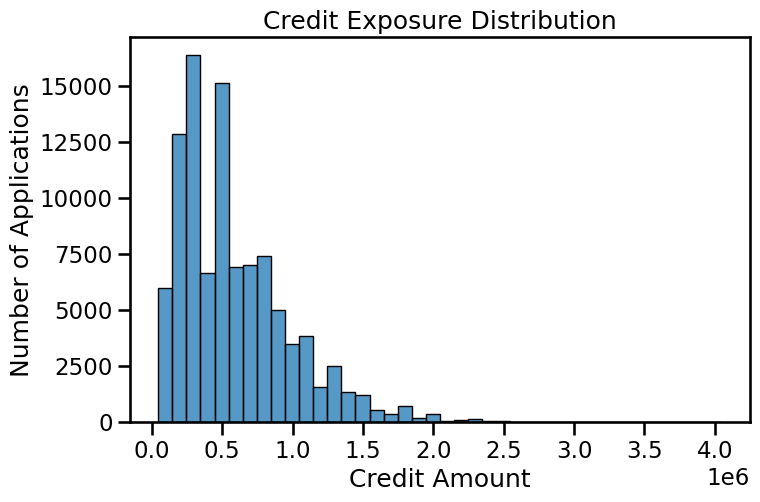

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AMT_CREDIT"], bins=40)
plt.title("Credit Exposure Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Number of Applications")
plt.show()


## Credit Exposure Interpretation

- The portfolio shows concentration around specific credit ranges.
- Higher exposure segments imply higher potential loss in case of default.
- Exposure-based segmentation will be used to identify risk concentration.


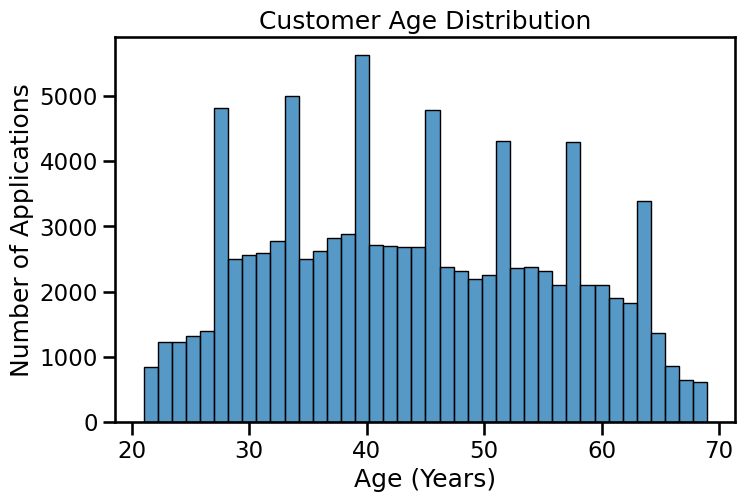

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AGE_YEARS"], bins=40)
plt.title("Customer Age Distribution")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Applications")
plt.show()


## Demographic Interpretation

- The age distribution provides insight into the dominant customer segments.
- Certain age groups may exhibit different risk profiles.
- Age-based segmentation can support differentiated credit policies.


In [8]:
df.isnull().mean().sort_values(ascending=False)


EXT_SOURCE_2            0.00195
CNT_FAM_MEMBERS         0.00001
SK_ID_CURR              0.00000
AMT_CREDIT              0.00000
AMT_INCOME_TOTAL        0.00000
REGION_RATING_CLIENT    0.00000
DAYS_BIRTH              0.00000
TARGET                  0.00000
AGE_YEARS               0.00000
dtype: float64

## Data Quality Considerations

- Missing values are expected in real-world credit data.
- From a management perspective, completeness affects reliability of risk indicators.
- Monitoring data quality is part of governance and reporting processes.


## Note on Target Variable

The available dataset is a feature-engineered version of the original Home Credit data.

The TARGET variable appears to be transformed and does not represent a raw binary
default flag. Therefore, default rate calculations are interpreted as a proxy risk
indicator rather than an actual default probability.

The analysis focuses on relative risk differences across segments.


## Summary

This notebook established the business context and reviewed the consolidated dataset
from a portfolio and management perspective.

Key outcomes:
- Defined baseline portfolio KPIs
- Assessed exposure and demographic structure
- Prepared business-friendly variables for segmentation

The next notebook focuses on **portfolio KPIs and segmentation**, translating these
foundations into actionable management insights.
